In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image
from sklearn.utils import class_weight



=== CARGANDO MODELO ===



=== PREDICCIÓN ===


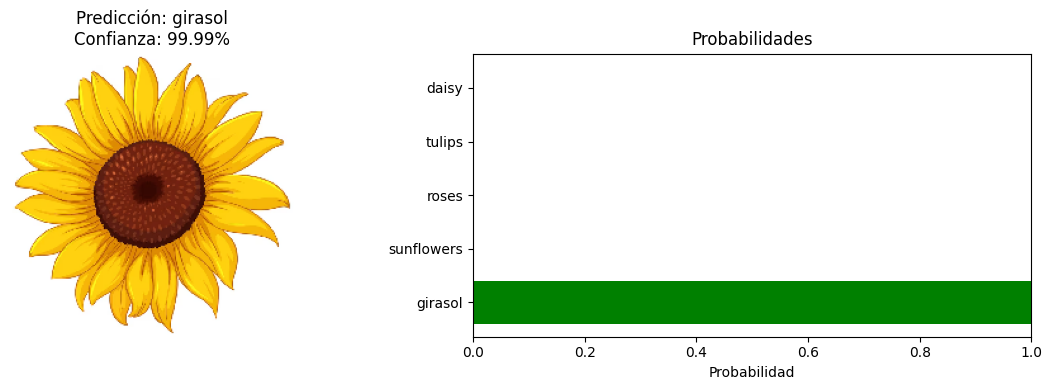


Clase predicha: girasol
Confianza: 99.99%

Todas las probabilidades:
  daisy: 0.00%
  girasol: 99.99%
  roses: 0.00%
  sunflowers: 0.00%
  tulips: 0.00%


In [ ]:
# ============ FUNCIÓN DE PREDICCIÓN ============
def predict_image(model, img_path, class_names, image_size=(224,224)):
    img = image.load_img(img_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    preds = model.predict(x, verbose=0)[0]
    top_idx = np.argmax(preds)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Predicción: {class_names[top_idx]}\nConfianza: {preds[top_idx]:.2%}")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    sorted_idx = np.argsort(preds)[::-1]
    colors = ['green' if i == top_idx else 'skyblue' for i in sorted_idx]
    plt.barh([class_names[i] for i in sorted_idx], [preds[i] for i in sorted_idx], color=colors)
    plt.xlabel('Probabilidad')
    plt.title('Probabilidades')
    plt.xlim([0, 1])
    plt.tight_layout()
    plt.show()
    
    return top_idx, preds[top_idx], preds

# ============ CARGAR Y PROBAR ============
print("\n=== CARGANDO MODELO ===")
inference_model = tf.keras.models.load_model("flower_model_final.h5")

class_names = ['diente de leon', 'girasol', 'margarita', 'rosa', 'tulipan']

print("\n=== PREDICCIÓN ===")
idx, prob, all_probs = predict_image(inference_model, "probar.jpg", class_names)

print(f"\nClase predicha: {class_names[idx]}")
print(f"Confianza: {prob:.2%}")
print("\nTodas las probabilidades:")
for cls, p in zip(class_names, all_probs):
    print(f"  {cls}: {p:.2%}")